In [1]:
# Necessary packages
!pip install -U evaluate datasets transformers jiwer -q

#code adapted from
https://www.kaggle.com/code/nbroad/whisper-training-starter-kit

In [3]:
ls /home/phison/LargeFiles/regional-asr/ben10/

16kHz_train_audio/  16kHz_valid_audio/  train.csv


In [11]:
!ls /home/phison/LargeFiles/regional-asr/ben10/16kHz_train_audio | head 

train_barishal (1000).wav
train_barishal (1001).wav
train_barishal (1002).wav
train_barishal (1003).wav
train_barishal (1004).wav
train_barishal (1005).wav
train_barishal (1006).wav
train_barishal (1007).wav
train_barishal (1008).wav
train_barishal (1009).wav
ls: write error: Broken pipe


In [5]:
!head /home/phison/LargeFiles/regional-asr/ben10/train.csv

file_name,transcripts,district
train_chittagong (1).wav,"কী অবস্তা ভাইয়া, তুঁই গম আসো না?  অ বালা আছি। 
তোঁয়ার বাড়ি খডে দে ভাইয়্যে?  
আঁর বাড়ি অইলদি কক্সবাজারর সকরিয়া। 
সকরিয়া খোন জাগাত ফইজ্জে দে তোঁয়ার বাড়ি ইবে? 
সকরিয়ার বড় মোহরি, ইন্দুফারা. 
বড় মোহরির মইদ্যে এহন তোঁয়ারার উইন্দি দি ছাত্রলীগর সভাপতি খন ?",chittagong
train_chittagong (2).wav,"খইত্তারো না? 
ছাত্রলীগের সভাপতি খন তো টিক ন জানি,  এ সম্পর্কে ধারণা নাই। 
আইচ্চে ইবেত সমস্যা নাই। আংকেল আন্টি ক্যান আছে? 


In [122]:
df_train = pd.read_csv('/home/phison/LargeFiles/regional-asr/ben10/train.csv')

In [123]:
df_train

,file_name,transcripts,district
0,train_chittagong (1).wav,"কী অবস্তা ভাইয়া, তুঁই গম আসো না? অ বালা আছি। ...",chittagong
1,train_chittagong (2).wav,খইত্তারো না? \nছাত্রলীগের সভাপতি খন তো টিক ন জ...,chittagong
2,train_chittagong (3).wav,দুই ভাই দে তোঁয়ার। তুঁই বড় না তোঁয়ার ভাই বড়? \...,chittagong
3,train_chittagong (4).wav,"উপ সহকারী কিষি অফিসার। \nমাশাল্লা, তয় ভালো জাগ...",chittagong
4,train_chittagong (5).wav,আততীয় সজন কি এক জাগাত থাকে নে? খত জাগাত থাকে! ...,chittagong
...,...,...,...
14249,train_sandwip (1050).wav,"হিয়া গোসল কচ্চে, ইয়া গোসল কচ্চে নে অন? ইয়ারে ক...",sandwip
14250,train_sandwip (1051).wav,"<> হইল্লা বারিন্দা <> ক <> বারিন্দাত, বারিন্দা...",sandwip
14251,train_sandwip (1052).wav,<> ইয়ারে তাইলে বিয়া দিবো বিফদ <> দুনুগা দুনুগা...,sandwip
14252,train_sandwip (1053).wav,বেগ্গিন দি চা <> ঘরে যাই ও ভাইয়া তো <> নির্বাচ...,sandwip


In [126]:
df_train.file_name.nunique()

14254

In [127]:
df_train.transcripts.nunique()

13919

In [128]:
df_train.transcripts.value_counts()

transcripts
বোলোয়িং ইন দা উইন্ড, এই গানের গায়কের নাম অইছে গিয়া বব দিলান। বব দিলানের গান আমার মোটামুটি ভাল্লাগে। বব দিলান ছাড়াও আরও অনেক গায়ক আছে।                                                                                                                                                                                                                                                                                                                                                                           2
হে বেডার গান আমার খুবই ভাল্লাগে। গানের মদ্দে আমার যেইসব জনরা আছে গানের, জনরা মানে অইছে গানের দরন।                                                                                                                                                                                                                                                                                                                                                                                                         

In [117]:
!ls /home/phison/LargeFiles/regional-asr/ben10/16kHz_train_audio | wc -l

14254


In [131]:
!ls /home/phison/LargeFiles/regional-asr/ben10_whisper_processed

eval_0_to_1000.parquet	      train_3000_to_4000.parquet
eval_1000_to_2000.parquet     train_4000_to_5000.parquet
eval_2000_to_2784.parquet     train_5000_to_6000.parquet
train_0_to_1000.parquet       train_6000_to_7000.parquet
train_10000_to_11000.parquet  train_7000_to_8000.parquet
train_1000_to_2000.parquet    train_8000_to_9000.parquet
train_11000_to_11145.parquet  train_9000_to_10000.parquet
train_2000_to_3000.parquet


In [132]:
import pandas as pd

In [133]:
df = pd.read_parquet('/home/phison/LargeFiles/regional-asr/ben10_whisper_processed/eval_0_to_1000.parquet')

In [134]:
df

,input_features,input_length,attention_mask,labels
0,"[[-0.2401725, -0.5449619, -0.7771318, -0.42016...",245248,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50258, 50302, 50359, 50363, 10971, 10390, 102..."
1,"[[1.0715854, 0.9306317, 0.91441816, 0.84587044...",189472,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50258, 50302, 50359, 50363, 11960, 10320, 102..."
2,"[[0.19391572, 0.2554822, 0.23420066, 0.2593929...",246720,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50258, 50302, 50359, 50363, 10767, 10293, 102..."
3,"[[0.5142905, 0.16211897, 0.13154393, -0.224413...",291840,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50258, 50302, 50359, 50363, 10839, 10259, 102..."
4,"[[0.7647373, 0.58451235, 0.4547087, 0.19831282...",241152,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50258, 50302, 50359, 50363, 10360, 12364, 102..."
...,...,...,...,...
995,"[[0.32214844, 0.43809688, 0.35612345, 0.148421...",246272,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50258, 50302, 50359, 50363, 10767, 10292, 102..."
996,"[[0.31257808, 0.42057806, 0.40841967, -0.01680...",270336,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50258, 50302, 50359, 50363, 10265, 10278, 102..."
997,"[[0.57277083, 0.30994207, 0.16707301, 0.166971...",252928,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50258, 50302, 50359, 50363, 10266, 10263, 102..."
998,"[[-0.40388167, -0.4872179, -0.623453, -0.52556...",244736,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[50258, 50302, 50359, 50363, 10279, 10260, 102..."


<Axes: ylabel='Frequency'>

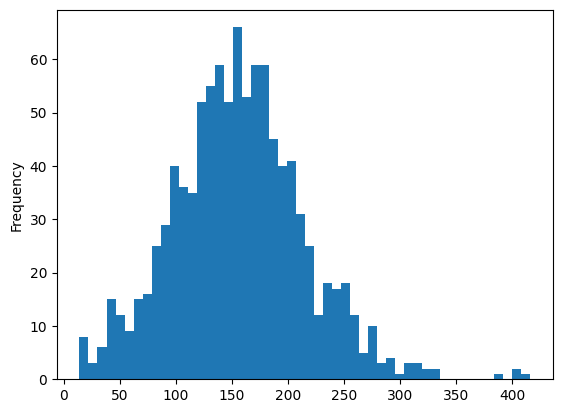

In [135]:
df['labels'].apply(lambda x: len(x)).plot.hist(bins = 50)

<Axes: ylabel='Frequency'>

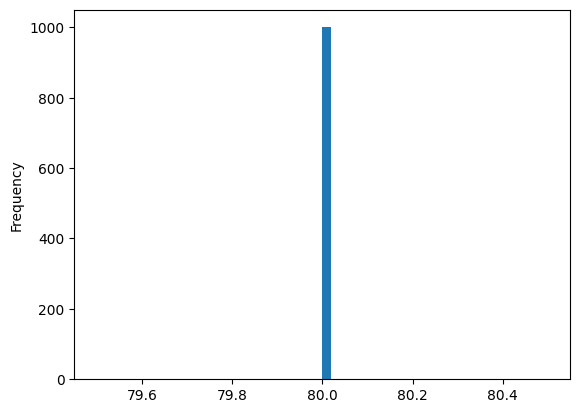

In [136]:
df['input_features'].apply(lambda x: x.shape[0]).plot.hist(bins = 50)

<Axes: ylabel='Frequency'>

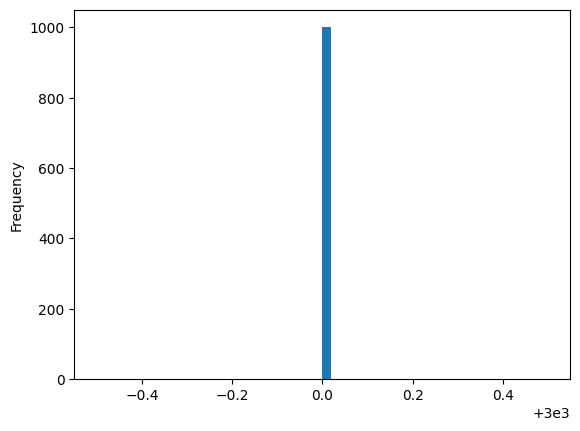

In [137]:
df['input_features'].apply(lambda x: x[0].shape[0]).plot.hist(bins = 50)

<Axes: ylabel='Frequency'>

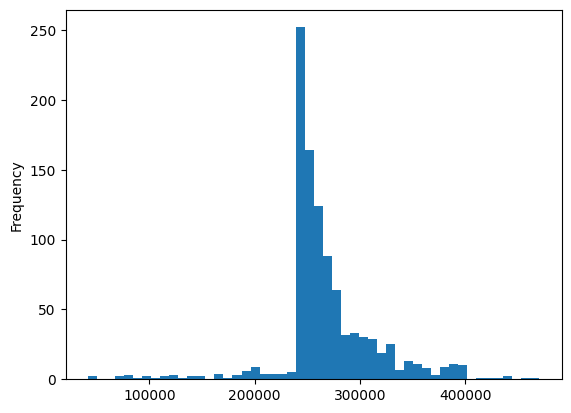

In [138]:
df['input_length'].plot.hist(bins = 50)